This file will make a plot of N/S vs. E/S, with colour indicating how good the analytic approximation is for the biomass expression. I will do this for both the first and second order approximations.

The equation being approximated is
$$ B = S \int \sum n \varepsilon R$$

and the approximation is
$$ B = 4.17 \frac{E^{4/3}}{S^{1/3} \log(1/\beta)} \left( 1-1.16 \beta^{1/3} \right) $$

Note that at this point, this includes the approximation for the normalization Z, so there are multiple approximations going on here.

Additionally, note that because we want to only have two variables, we are redefining N/S, E/S as just N and E, and B becomes B/S. In this case, the S dependence actually just drops out. So we can pick an S and plot accordingly. We here choose S=50. Initially, I picked S=1, however this doesn't work very well because the sum for the first constraint goes to N, but it is equal to N/S. So we want S>1 to make these not the same. So that this error in summation doesn't have a large effect, we need S $\approx$ 30 at the smallest, but closer to S=50. See TestingApprox_Plot.ipynb for more information. Note also that the data does go below this threshold, so there is an argument that we should put these points as an asterix or something.

In [1]:
import pandas as pd
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
%matplotlib inline

# Import biomass grid data
Because running the code below to calculate the biomass at every grid point is really slow, I've saved them as csv files and then import them here. If you do not have access to the biomass grids, the code below will calculate and save them to file.

In [2]:
# These are the grids saved with ns=200 and es=200.
# See the README for more info, but here are the parameter ranges used to generate these grids
s0 = 50
num_ns = 200
num_es = 200
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Import the grids
biomass_num = np.loadtxt('biomass_grid_num.txt')
biomass_1 = np.loadtxt('biomass_grid_0.txt')
biomass_2 = np.loadtxt('biomass_grid_1.txt')

# Set up for plot

In [3]:
# Get percent differences. Note that in doing this, the S dependence drops out. Since really we care about B/S
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))
# Note, an alternative would be to make these positive, 
# then the scale may be slightly easier to interpret in some ways. 
# Though then the higher number is worse, so I think I prefer this.

In [5]:
# Read in the data to overlay
data = pd.read_csv('data_statevariables.txt')

# Plot
This plot shows how well the approximation does within the defined range. It plots the negative log of the absolute value of the percent difference. That is kind of confusing, but essentially the number is to how many decimal places the approximation is good, though it does not tell the direction of the error.

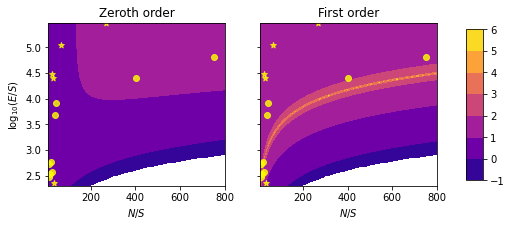

In [6]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour,cmap='plasma')
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour,cmap='plasma')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(data[ind_st]['N']/data[ind_st]['S'],np.log10(data[ind_st]['E']/data[ind_st]['S']),
               c='yellow',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(data[~ind_st]['N']/data[~ind_st]['S'],np.log10(data[~ind_st]['E']/data[~ind_st]['S']),
               marker='*',c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/S)$')
for ax in axs:
    ax.set_xlabel(r'$N/S$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('figures/logcontours.pdf',bbox_inches='tight')

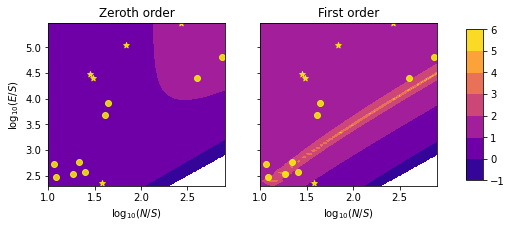

In [7]:
# With log(N/S)
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(np.log10(ns),np.log10(es),z_bm1,contour,cmap='plasma')
im2 = axs[1].contourf(np.log10(ns),np.log10(es),z_bm2,contour,cmap='plasma')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(np.log10(data[ind_st]['N']/data[ind_st]['S']),np.log10(data[ind_st]['E']/data[ind_st]['S']),
               c='yellow',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(np.log10(data[~ind_st]['N']/data[~ind_st]['S']),np.log10(data[~ind_st]['E']/data[~ind_st]['S']),
               marker='*',c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/S)$')
for ax in axs:
    ax.set_xlabel(r'$\log_{10}(N/S)$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('figures/logcontours_logn.pdf',bbox_inches='tight')

## What about E/N instead of N/S?
Try from scratch with smaller sample size, then see if I can manipulate the biomass array to do it. This should be do-able, but I don't think it's important enough to spend time on given I have the smaller sample size plot.

In [8]:
# Define ns and en along with the number in each direction.
# Just do a small sample to see what it looks like
num_ns = 20
num_en = 20
ns = np.linspace(10,800,num=num_ns)
en = np.logspace(np.log10(5),np.log10(2000),num=num_en)

# Set s also
s0=50 

In [9]:
# Numerical
biomass_num = np.zeros([num_en,num_ns]) 
# First order
biomass_1 = np.zeros([num_en,num_ns]) 
# Second order
biomass_2 = np.zeros([num_en,num_ns])

# This is slow but should be ok just for a plot
for i,e in enumerate(en):
    for j,n in enumerate(ns):
        s = pd.Series([s0,n*s0,e*n*s0],index=['S','N','E'])
        print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
        biomass_num[i,j] = bm.biomass(s)
        biomass_1[i,j] = bm.biomass_approx(s,order=0)
        biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 5.000000000000001
51.578947368421055 5.000000000000001
93.15789473684211 5.000000000000001
134.73684210526318 5.000000000000001
176.31578947368422 5.000000000000001
217.89473684210526 5.000000000000001
259.47368421052636 5.000000000000001
301.0526315789474 5.000000000000001
342.63157894736844 5.000000000000001
384.2105263157895 5.000000000000001
425.7894736842105 5.000000000000001
467.3684210526316 5.000000000000001
508.94736842105266 5.000000000000001
550.5263157894738 5.000000000000001
592.1052631578948 5.000000000000001
633.6842105263158 5.000000000000001
675.2631578947369 5.000000000000001
716.8421052631579 5.000000000000001
758.421052631579 5.000000000000001
800.0 5.000000000000001
10.0 6.853628031883595
51.578947368421055 6.853628031883595
93.15789473684211 6.853628031883595
134.73684210526318 6.853628031883595
176.31578947368422 6.853628031883595
217.89473684210526 6.853628031883595
259.47368421052636 6.853628031883595
301.0526315789474 6.853628031883595
342.63157894736844 

550.5263157894738 160.48180071713404
592.1052631578948 160.48180071713404
633.6842105263158 160.48180071713404
675.2631578947369 160.48180071713404
716.8421052631579 160.48180071713404
758.421052631579 160.48180071713404
800.0 160.48180071713404
10.0 219.97651360042127
51.578947368421055 219.97651360042127
93.15789473684211 219.97651360042127
134.73684210526318 219.97651360042127
176.31578947368422 219.97651360042127
217.89473684210526 219.97651360042127
259.47368421052636 219.97651360042127
301.0526315789474 219.97651360042127
342.63157894736844 219.97651360042127
384.2105263157895 219.97651360042127
425.7894736842105 219.97651360042127
467.3684210526316 219.97651360042127
508.94736842105266 219.97651360042127
550.5263157894738 219.97651360042127
592.1052631578948 219.97651360042127
633.6842105263158 219.97651360042127
675.2631578947369 219.97651360042127
716.8421052631579 219.97651360042127
758.421052631579 219.97651360042127
800.0 219.97651360042127
10.0 301.52743999357386
51.578947

In [10]:
# Get percent differences. Note that in doing this, the S dependence drops out. Since really we care about B/S
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

In [11]:
# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

In [12]:
# Read in the data to overlay
data = pd.read_csv('data_statevariables.txt')

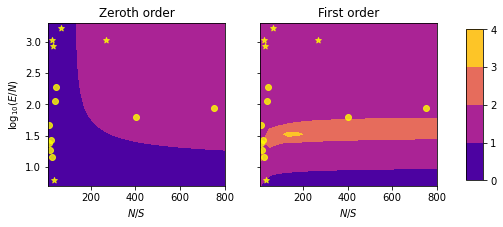

In [13]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(en),z_bm1,contour,cmap='plasma')
im2 = axs[1].contourf(ns,np.log10(en),z_bm2,contour,cmap='plasma')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(data[ind_st]['N']/data[ind_st]['S'],np.log10(data[ind_st]['E']/data[ind_st]['N']),
               c='yellow',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(data[~ind_st]['N']/data[~ind_st]['S'],np.log10(data[~ind_st]['E']/data[~ind_st]['N']),
               marker='*',c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/N)$')
for ax in axs:
    ax.set_xlabel(r'$N/S$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('figures/logcontours_en.pdf',bbox_inches='tight')

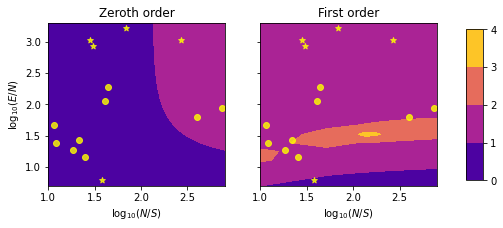

In [14]:
# With log N/S
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(np.log10(ns),np.log10(en),z_bm1,contour,cmap='plasma')
im2 = axs[1].contourf(np.log10(ns),np.log10(en),z_bm2,contour,cmap='plasma')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(np.log10(data[ind_st]['N']/data[ind_st]['S']),np.log10(data[ind_st]['E']/data[ind_st]['N']),
               c='yellow',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(np.log10(data[~ind_st]['N']/data[~ind_st]['S']),np.log10(data[~ind_st]['E']/data[~ind_st]['N']),
               marker='*',c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/N)$')
for ax in axs:
    ax.set_xlabel(r'$\log_{10}(N/S)$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('figures/logcontours_en_logn.pdf',bbox_inches='tight')

# Calculate biomass grids and save to file

If the biomass grids are not already saved to file, run this part of the code first.

## Ranges for N/S and E/S
The smallest N/S from the data that John has in the table is the Hawaiian arthropods at the Volcano site, with about 11. The largest N/S is 750 at BCI.

The smallest E/S from the data is about 231 from the temperate invetebrates, and the largest is about 290 000 at UCSC.

In [3]:
# Getting the range more accurately
# Read in data
data = pd.read_csv('data_statevariables.txt')
data_ns = data['N']/data['S']
data_es = data['E']/data['S']
# Get max and min
ns_max = np.max(data_ns)
ns_min = np.min(data_ns)
es_max = np.max(data_es)
es_min = np.min(data_es)
print(ns_min,ns_max)
print(es_min,es_max)

11.431137724550899 750.8196721311475
231.0 290354.8387096774


In [4]:
# Define ns and es along with the number in each direction.
# Choose the min and max to be slightly more than th data in each direction.
# Note that 200x200 will take forever to run, so instead you can import the grid.
num_ns = 200
num_es = 200
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

In [6]:
# Define the default S to use.
# This should really be at least 50, though on the plots around 30 also seems to work.
s0 = 50

## Get biomasses
Get a grid of biomasses within the defined range.

In [7]:
# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [8]:
# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

425.7894736842105 3331.2218530274818
467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.8421052631579 4018.29478975542
758.421052631579 4

134.73684210526318 31612.75938459414
176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.36

633.6842105263158 248704.14148213228
675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [ ]:
# Save these massive files
np.savetxt('biomass_grid_num.txt',biomass_num)
np.savetxt('biomass_grid_0.txt',biomass_1)
np.savetxt('biomass_grid_1.txt',biomass_2)

# Plot for paper
This plot shows how well the approximation does within the defined range. It plots the negative log of the absolute value of the percent difference. That is kind of confusing, but essentially the number is to how many decimal places the approximation is good, though it does not tell the direction of the error.

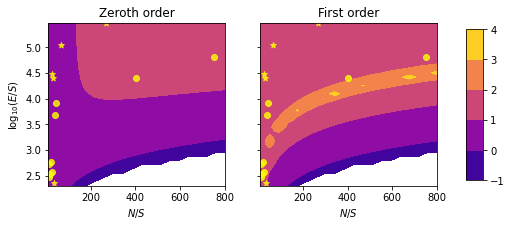

In [31]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour,cmap='plasma')
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour,cmap='plasma')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(data[ind_st]['N']/data[ind_st]['S'],np.log10(data[ind_st]['E']/data[ind_st]['S']),
               c='yellow',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(data[~ind_st]['N']/data[~ind_st]['S'],np.log10(data[~ind_st]['E']/data[~ind_st]['S']),
               marker='*',c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/S)$')
for ax in axs:
    ax.set_xlabel(r'$N/S$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

# Save this as just logcontours.pdf to differentiate it from the other files. 
# It should be the same as some of the other figures though.
fig.savefig('figures/logcontours.pdf')